In [1]:

import os

# Path to your dataset
dataset_path ="/kaggle/input/report-data-for-aug-bmc"

# Dictionary to store class-wise image counts
class_counts = {}

# Variable to store total image count
total_images = 0

# Loop through each class folder
for class_name in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):  # Ensure it's a directory
        num_images = len([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = num_images
        total_images += num_images  # Update total count

# Print the number of images per class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Print total number of images
print(f"\nTotal images in dataset: {total_images}")


ABE: 8 images
ART: 3000 images
BAS: 441 images
BLA: 3000 images
EBO: 3000 images
EOS: 3000 images
FGC: 47 images
HAC: 409 images
KSC: 42 images
LYI: 65 images
LYT: 3000 images
MMZ: 3000 images
MON: 3000 images
MYB: 3000 images
NGB: 3000 images
NGS: 3000 images
NIF: 3000 images
OTH: 294 images
PEB: 2740 images
PLM: 3000 images
PMO: 3000 images

Total images in dataset: 43046


In [2]:
import os
import shutil
from PIL import Image
import random
from torchvision import transforms

# Define source and destination
src_path = "/kaggle/input/report-data-for-aug-bmc"
dst_path = "/kaggle/working/augmented_dataset"

# Target augmentation counts
target_counts = {
    "ABE": 500, "FGC": 500, "KSC": 500, "LYI": 500,
    "BAS": 1000, "HAC": 1000, "OTH": 1000
}

# Create destination directory
os.makedirs(dst_path, exist_ok=True)

# Copy all images to working directory
for class_name in sorted(os.listdir(src_path)):
    src_class_dir = os.path.join(src_path, class_name)
    dst_class_dir = os.path.join(dst_path, class_name)
    os.makedirs(dst_class_dir, exist_ok=True)
    
    if os.path.isdir(src_class_dir):
        for filename in os.listdir(src_class_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                shutil.copy(os.path.join(src_class_dir, filename), dst_class_dir)


In [3]:
# Define transform
transform = transforms.Compose([
    transforms.RandomRotation(degrees=20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
])

# Perform augmentation for specific classes
for class_name, target in target_counts.items():
    class_dir = os.path.join(dst_path, class_name)
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    count = len(images)
    i = 0
    
    while count < target:
        img_name = random.choice(images)
        img_path = os.path.join(class_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        augmented = transform(image)
        
        new_filename = f"aug_{i}_{img_name}"
        augmented.save(os.path.join(class_dir, new_filename))
        
        count += 1
        i += 1

    print(f"{class_name} augmented to {count} images")


ABE augmented to 500 images
FGC augmented to 500 images
KSC augmented to 500 images
LYI augmented to 500 images
BAS augmented to 1000 images
HAC augmented to 1000 images
OTH augmented to 1000 images


In [4]:
# Print final counts
final_total = 0
print("\nFinal class-wise image counts:")
for class_name in sorted(os.listdir(dst_path)):
    class_dir = os.path.join(dst_path, class_name)
    num_images = len([img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
    print(f"{class_name}: {num_images} images")
    final_total += num_images

print(f"\nTotal images after augmentation: {final_total}")



Final class-wise image counts:
ABE: 500 images
ART: 3000 images
BAS: 1000 images
BLA: 3000 images
EBO: 3000 images
EOS: 3000 images
FGC: 500 images
HAC: 1000 images
KSC: 500 images
LYI: 500 images
LYT: 3000 images
MMZ: 3000 images
MON: 3000 images
MYB: 3000 images
NGB: 3000 images
NGS: 3000 images
NIF: 3000 images
OTH: 1000 images
PEB: 2740 images
PLM: 3000 images
PMO: 3000 images

Total images after augmentation: 46740


In [5]:
import os
import shutil
import random

# Define dataset paths
dataset_path = "/kaggle/working/augmented_dataset"  # Original dataset
output_base = "/kaggle/working/SPLIT_DATASET"  # New dataset location

# Define split ratios
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

# Function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Create base directories for splits
for split in ["train", "val", "test"]:
    create_dir(os.path.join(output_base, split))

# Iterate over each class and split images
for class_name in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):  # Ensure it's a directory
        images = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random.shuffle(images)  # Shuffle for randomness
        
        # Compute split sizes
        total = len(images)
        train_size = int(total * train_ratio)
        val_size = int(total * val_ratio)
        
        # Split images
        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        # Create class subfolders
        for split in ["train", "val", "test"]:
            create_dir(os.path.join(output_base, split, class_name))

        # Copy images to respective directories
        for img_name in train_images:
            shutil.copy(os.path.join(class_folder, img_name), os.path.join(output_base, "train", class_name, img_name))

        for img_name in val_images:
            shutil.copy(os.path.join(class_folder, img_name), os.path.join(output_base, "val", class_name, img_name))

        for img_name in test_images:
            shutil.copy(os.path.join(class_folder, img_name), os.path.join(output_base, "test", class_name, img_name))

print("✅ Dataset successfully split into Train, Validation, and Test sets.")


✅ Dataset successfully split into Train, Validation, and Test sets.


In [6]:
import os

# Define split dataset path
split_dataset_path = "/kaggle/working/SPLIT_DATASET"

# Dictionary to store image counts
split_counts = {"train": {}, "val": {}, "test": {}}
total_counts = {"train": 0, "val": 0, "test": 0}

# Iterate over train, val, test folders
for split in ["train", "val", "test"]:
    split_folder = os.path.join(split_dataset_path, split)
    
    for class_name in sorted(os.listdir(split_folder)):
        class_folder = os.path.join(split_folder, class_name)
        
        if os.path.isdir(class_folder):  # Ensure it's a directory
            num_images = len([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
            split_counts[split][class_name] = num_images
            total_counts[split] += num_images  # Update total count

# Print the number of images per class in each split
for split in ["train", "val", "test"]:
    print(f"\n📂 {split.upper()} SET:")
    for class_name, count in split_counts[split].items():
        print(f"   {class_name}: {count} images")
    print(f"🔹 Total images in {split}: {total_counts[split]}")

# Print total images across all splits
grand_total = sum(total_counts.values())
print(f"\n✅ Grand Total images after splitting: {grand_total}")



📂 TRAIN SET:
   ABE: 350 images
   ART: 2100 images
   BAS: 700 images
   BLA: 2100 images
   EBO: 2100 images
   EOS: 2100 images
   FGC: 350 images
   HAC: 700 images
   KSC: 350 images
   LYI: 350 images
   LYT: 2100 images
   MMZ: 2100 images
   MON: 2100 images
   MYB: 2100 images
   NGB: 2100 images
   NGS: 2100 images
   NIF: 2100 images
   OTH: 700 images
   PEB: 1917 images
   PLM: 2100 images
   PMO: 2100 images
🔹 Total images in train: 32717

📂 VAL SET:
   ABE: 75 images
   ART: 450 images
   BAS: 150 images
   BLA: 450 images
   EBO: 450 images
   EOS: 450 images
   FGC: 75 images
   HAC: 150 images
   KSC: 75 images
   LYI: 75 images
   LYT: 450 images
   MMZ: 450 images
   MON: 450 images
   MYB: 450 images
   NGB: 450 images
   NGS: 450 images
   NIF: 450 images
   OTH: 150 images
   PEB: 411 images
   PLM: 450 images
   PMO: 450 images
🔹 Total images in val: 7011

📂 TEST SET:
   ABE: 75 images
   ART: 450 images
   BAS: 150 images
   BLA: 450 images
   EBO: 450 images


2025-04-16 07:41:57.389632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744789317.581314      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744789317.635292      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 32717 images belonging to 21 classes.
Found 7011 images belonging to 21 classes.
Class weights: {0: 4.451292517006802, 1: 0.7418820861678005, 2: 2.225646258503401, 3: 0.7418820861678005, 4: 0.7418820861678005, 5: 0.7418820861678005, 6: 4.451292517006802, 7: 2.225646258503401, 8: 4.451292517006802, 9: 4.451292517006802, 10: 0.7418820861678005, 11: 0.7418820861678005, 12: 0.7418820861678005, 13: 0.7418820861678005, 14: 0.7418820861678005, 15: 0.7418820861678005, 16: 0.7418820861678005, 17: 2.225646258503401, 18: 0.8127033807784981, 19: 0.7418820861678005, 20: 0.7418820861678005}


I0000 00:00:1744789332.585355      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744789438.941500      73 service.cc:148] XLA service 0x7a01a8002ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744789438.942450      73 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744789448.782629      73 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1744789499.769142      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1023/1023 ━━━━━━━━━━━━━━━━━━━━ 667s 496ms/step - accuracy: 0.2984 - loss: 2.6811 - val_accuracy: 0.6972 - val_loss: 1.4996 - learning_rate: 0.0010
Epoch 2/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 439s 426ms/step - accuracy: 0.6872 - loss: 1.4763 - val_accuracy: 0.7668 - val_loss: 1.3194 - learning_rate: 0.0010
Epoch 3/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 435s 422ms/step - accuracy: 0.7459 - loss: 1.3142 - val_accuracy: 0.7832 - val_loss: 1.2642 - learning_rate: 0.0010
Epoch 4/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 428s 415ms/step - accuracy: 0.7701 - loss: 1.2457 - val_accuracy: 0.7749 - val_loss: 1.2637 - learning_rate: 0.0010
Epoch 5/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 434s 421ms/step - accuracy: 0.8032 - loss: 1.1664 - val_accuracy: 0.7965 - val_loss: 1.2098 - learning_rate: 0.0010
Epoch 6/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 435s 422ms/step - accuracy: 0.8182 - loss: 1.1276 - val_accuracy: 0.8220 - val_loss: 1.1483 - learning_rate: 0.0010
Epoch 7/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 434s 421ms/step - acc

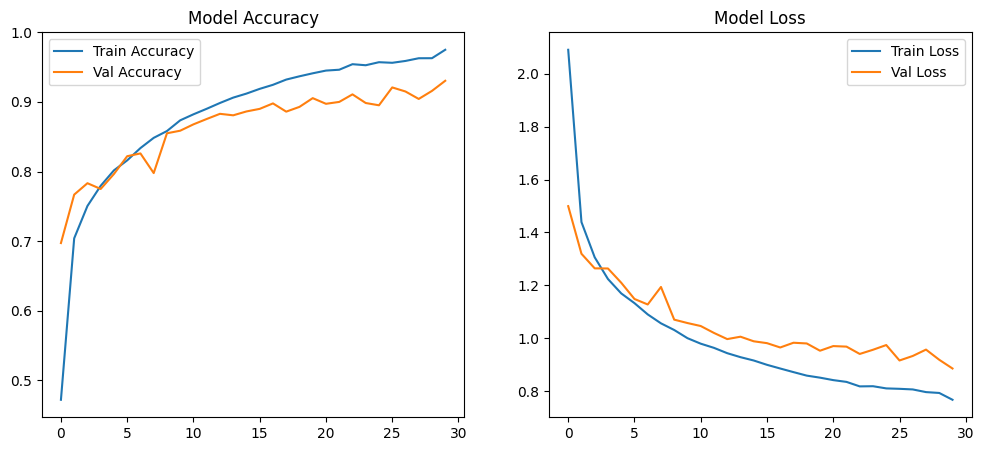

✅ Model training complete! Best model saved as 'best_resnet152_model.keras'


In [7]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Define dataset paths
data_dir = "/kaggle/working/SPLIT_DATASET"

# Image parameters
img_size = (224, 224)  # ResNet152 default input size
batch_size = 32

# Data augmentation for training (more robust transformations)
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,  # ResNet-specific normalization
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]  # Adjust brightness randomly
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation dataset
val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# ✅ Compute class weights
labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Load ResNet152 pre-trained model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Unfreeze last few layers for fine-tuning
for layer in base_model.layers[-30:]:  
    layer.trainable = True  # Fine-tune last 30 layers

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)  # L2 regularization added
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=output)

# Compile model with optimized SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True), 
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1), 
              metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_resnet152_model.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)  # Reduce LR on plateau
]

# ✅ Train model with class weights
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # Train for more epochs with early stopping
    callbacks=callbacks,
    class_weight=class_weights  # <--- Added here
)

# Function to plot training performance
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend() 
    plt.title('Model Loss')
    
    plt.show()

# Show performance
plot_history(history)

print("✅ Model training complete! Best model saved as 'best_resnet152_model.keras'")


Found 7012 images belonging to 21 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


220/220 ━━━━━━━━━━━━━━━━━━━━ 50s 165ms/step
✅ Test Accuracy: 0.9325


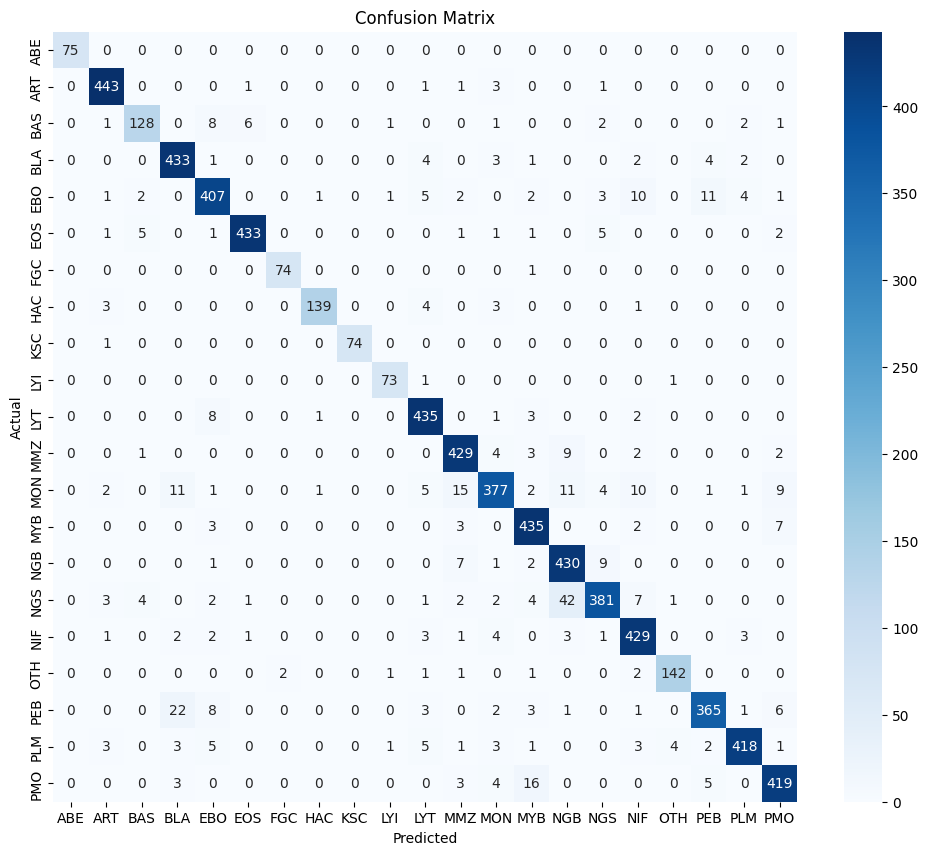

Classification Report:

              precision    recall  f1-score   support

         ABE       1.00      1.00      1.00        75
         ART       0.97      0.98      0.97       450
         BAS       0.91      0.85      0.88       150
         BLA       0.91      0.96      0.94       450
         EBO       0.91      0.90      0.91       450
         EOS       0.98      0.96      0.97       450
         FGC       0.97      0.99      0.98        75
         HAC       0.98      0.93      0.95       150
         KSC       1.00      0.99      0.99        75
         LYI       0.95      0.97      0.96        75
         LYT       0.93      0.97      0.95       450
         MMZ       0.92      0.95      0.94       450
         MON       0.92      0.84      0.88       450
         MYB       0.92      0.97      0.94       450
         NGB       0.87      0.96      0.91       450
         NGS       0.94      0.85      0.89       450
         NIF       0.91      0.95      0.93       450
   

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Load test dataset
test_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for correct predictions vs. labels alignment
)

# Load best model
best_model = tf.keras.models.load_model("best_resnet152_model.keras")

# Predict
preds = best_model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# ✅ Accuracy
test_acc = accuracy_score(true_classes, predicted_classes)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# ✅ Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification Report
print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [9]:
import pickle
import json

# Step 1: Save the model architecture as JSON
model_json = best_model.to_json()

with open("resnet152_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

print("✅ Model architecture saved as resnet152_model_architecture.json")

# Step 2: Save model weights (filename MUST end with .weights.h5)
best_model.save_weights("resnet152_model.weights.h5")
print("✅ Model weights saved as resnet152_model.weights.h5")

# Step 3: Save class indices for decoding predictions
class_indices = test_generator.class_indices

with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)
print("✅ Class indices saved as class_indices.json")

# Step 4: Save everything into a single .pkl file (reference dictionary)
model_info = {
    "architecture_path": "resnet152_model_architecture.json",
    "weights_path": "resnet152_model.weights.h5",
    "class_indices_path": "class_indices.json",
    "num_classes": best_model.output_shape[-1]
}

with open("resnet152_model_reference.pkl", "wb") as f:
    pickle.dump(model_info, f)

print("✅ Model reference info saved as resnet152_model_reference.pkl")


✅ Model architecture saved as resnet152_model_architecture.json
✅ Model weights saved as resnet152_model.weights.h5
✅ Class indices saved as class_indices.json
✅ Model reference info saved as resnet152_model_reference.pkl
